In [62]:
# Read AQI Data, calculate average AQI in a week
# Read Population Data, Area Data, Make density 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [106]:
df_gdp= pd.read_csv('../get_gdp/city_gdp.csv')
# df_gdp = df_temperature[['city','country','oct','nov','dec']]
print(df_gdp)
print(df_gdp.dtypes)
df_gdp = df_gdp.dropna()
df_gdp = df_gdp.drop([408,409])

                             city     gdp  year
0         Aachen-Liège-Maastricht     NaN   NaN
1    Abbotsford, British Columbia   5.313  2016
2                        Aberdeen  16.986  2013
3                         Abidjan      27  2017
4                       Abu Dhabi     119   NaN
..                            ...     ...   ...
405                        Zhuhai    38.0  2017
406                          Zibo    70.8  2017
407                        Zürich     NaN   NaN
408                          city     gdp  year
409                          city     gdp  year

[410 rows x 3 columns]
city    object
gdp     object
year    object
dtype: object


In [107]:
from unidecode import unidecode
def remove_non_ascii(text):
    return unidecode(unidecode(text))
import re
def format_ascii_string(input=''):
    output = re.sub(r'[^\x00-\x7f]',' ', input)
    return output


df_gdp['city'] = df_gdp['city'].map(lambda x: remove_non_ascii(x))
# Convert Datatype of Temperature to Float
df_gdp['gdp'] = df_gdp['gdp'].map(lambda x: float(x))

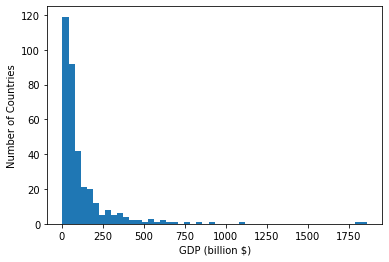

In [109]:
import matplotlib.pyplot as plt 

y = df_gdp['city'].tolist()
x = df_gdp['gdp'].tolist()
plt.hist(x,bins=50)
plt.ylabel('Number of Countries')
plt.xlabel('GDP (billion $)')
plt.show()

In [111]:
import pandasql as ps
sql = 'SELECT * from df_aqi_1 JOIN df_gdp ON df_aqi_1.city = df_gdp.city'
df_result = ps.sqldf(sql,locals())

In [84]:
df_result

,city,AQI,city,gdp,year
0,Abidjan,64.583333,Abidjan,27.000,2017
1,Adelaide,40.937500,Adelaide,64.461,2018–19
2,Ahmedabad,158.454545,Ahmedabad,59.000,2017
3,Albuquerque,62.913669,Albuquerque,42.896,2018
4,Almaty,63.750000,Almaty,36.000,2010
...,...,...,...,...,...
196,Xiamen,135.182927,Xiamen,92.554,2020
197,Xuzhou,119.319277,Xuzhou,97.800,2017
198,Yantai,96.024242,Yantai,108.700,2017
199,Yerevan,191.935065,Yerevan,5.230,2018


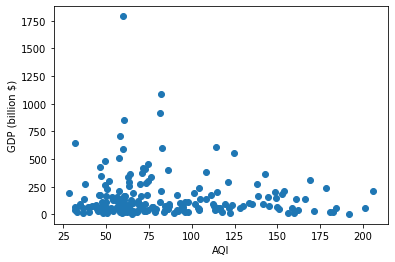

In [112]:
import matplotlib.pyplot as plt 

x = df_result['AQI'].tolist()
y = df_result['gdp'].tolist()
plt.scatter(x,y)
plt.ylabel('GDP (billion $)')
plt.xlabel('AQI')

plt.show()